<a href="https://colab.research.google.com/github/LijiAlex/codePlaza/blob/master/mask_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#pip install opencv-python
#pip install numpy
import cv2 #opencv
import numpy as np  
from IPython.display import Image #display image on Colab

Mount Drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read and display the image

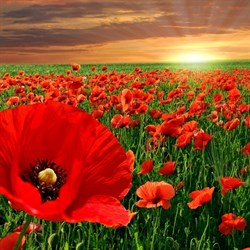

In [18]:
img=cv2.imread("/content/drive/My Drive/Colab Notebooks/ColourMask/sample1.jpg")
display(Image(filename="/content/drive/My Drive/Colab Notebooks/ColourMask/sample1.jpg"))

Convert to HSV

In [19]:
hsv = cv2.cvtColor(img , cv2.COLOR_BGR2HSV)


Convert to grayscale

In [20]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Create red mask

In [21]:
#red mask

lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])
mask1 = cv2.inRange(hsv,lower_red,upper_red)
lower_red = np.array([170, 50, 50])
upper_red = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv,lower_red,upper_red)

maskred = mask1+mask2

Create green mask

In [22]:
#green mask
lower_green = np.array([32, 50, 50])
upper_green = np.array([79, 255, 255])
maskgreen = cv2.inRange(hsv,lower_green,upper_green)

In original image ,blacken the areas which are not red

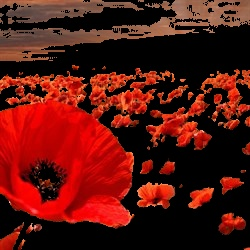

In [23]:
#output = cv2.bitwise_and(img, img, mask = mask1)
# set my output img to zero everywhere except my mask
output_imgred = img.copy()
output_imgred[np.where(maskred==0)] = 0

cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ColourMask/maskedRed.jpg",output_imgred)
display(Image(filename="/content/drive/My Drive/Colab Notebooks/ColourMask/maskedRed.jpg"))

In original image ,blacken the areas which are not green

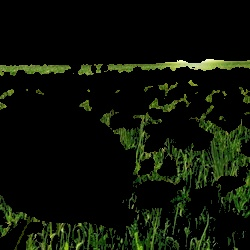

In [24]:
#output = cv2.bitwise_and(img, img, mask = mask1)
# set my output img to zero everywhere except my mask
output_imggreen = img.copy()
output_imggreen[np.where(maskgreen==0)] = 0

cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ColourMask/maskedGreen.jpg",output_imggreen)
display(Image(filename="/content/drive/My Drive/Colab Notebooks/ColourMask/maskedGreen.jpg"))

In grayscale image ,blacken the red areas

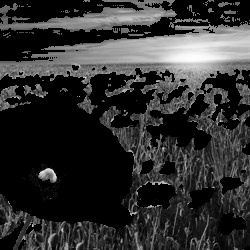

In [25]:
#mask gray for red
gray_threered = cv2.merge([gray,gray,gray])
gray_threered[np.where(maskred==255)]=0

cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ColourMask/maskedGrayRed.jpg",gray_threered)
display(Image(filename="/content/drive/My Drive/Colab Notebooks/ColourMask/maskedGrayRed.jpg"))

In grayscale image ,blacken green areas

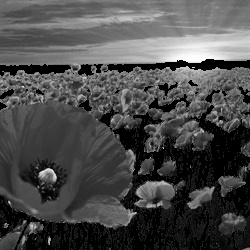

In [26]:
#mask gray for green
gray_threegreen = cv2.merge([gray,gray,gray])
gray_threegreen[np.where(maskgreen==255)]=0

cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ColourMask/maskedGrayGreen.jpg",gray_threegreen)
display(Image(filename="/content/drive/My Drive/Colab Notebooks/ColourMask/maskedGrayGreen.jpg"))

Create final output by merging both images

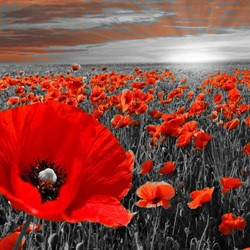

In [27]:
#highlight red in gray
final_output = cv2.addWeighted(output_imgred,1,gray_threered,1,0)
cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ColourMask/outputred.jpg",final_output)
display(Image(filename="/content/drive/My Drive/Colab Notebooks/ColourMask/outputred.jpg"))

Create final output by merging both images

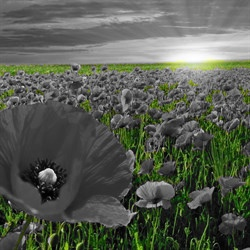

In [28]:
#highlight green in gray
final_output = cv2.addWeighted(output_imggreen,1,gray_threegreen,1,0)
cv2.imwrite("/content/drive/My Drive/Colab Notebooks/ColourMask/outputgreen.jpg",final_output)
display(Image(filename="/content/drive/My Drive/Colab Notebooks/ColourMask/outputgreen.jpg"))